---
# ML : Algorithme supervisé

### Importation des librairies

In [209]:
import seaborn as sns; sns.set()
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np

### Importation du dataset

In [210]:
iris = sns.load_dataset('iris')

### En-tête du dataset

In [211]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Infos sur la variable cible

In [212]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [213]:
iris['species'].nunique()

3

### Affichage d'un pariplot

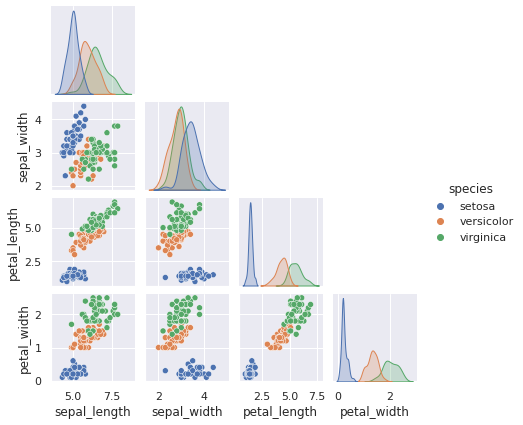

In [214]:
sns.pairplot(iris, hue="species", diag_kind="kde", height=1.5, corner=True)


### On convertit les classes en code numérique

In [215]:
Y = iris['species'].astype('category').cat.codes

### Dictionnaires pour convertir classe/code

In [216]:
vocab = iris['species'].astype('category').cat.categories
classe2index = { v:i for i, v in enumerate(vocab.tolist())}
index2classe = { i:v for i, v in enumerate(vocab.tolist())}

### Séparation des features (X) et de la target (Y)

In [217]:
X = iris.drop('species', axis="columns")

In [218]:
X.shape, Y.shape

((150, 4), (150,))

---
## K - Nearest neighbors

### Création de l'algorithme

In [219]:
knn = KNN(n_neighbors=3)
print(knn)

KNeighborsClassifier(n_neighbors=3)


### L'algo apprend les données

In [220]:
knn.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

### L'algorithme prédit pour chaque exampe

In [221]:
knn.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

### Créer une mesure de précision

In [222]:
def get_accuracy(preds, target):
    m = target.shape[0] # nombre d'exemples
    total_correct = (preds == target).sum()
    accuracy = total_correct / m
    return accuracy

### On vérifie l'accuracy de notre prédiction

In [223]:
predictions = knn.predict(X)
get_accuracy(predictions, Y)

0.96

### On crée un dataframe aléatoire avec une forme de lune

In [224]:
X, Y = make_moons(random_state=0, noise=0.3)

In [225]:
X.shape, Y.shape

((100, 2), (100,))

In [226]:
df_moon = pd.DataFrame({'X0':X[:,0],
                        'X1':X[:,1],
                        'Y':Y})
df_moon.head()

,X0,X1,Y
0,0.031595,0.986988,0
1,2.115098,-0.046244,1
2,0.882490,-0.075756,0
3,-0.055144,-0.037332,1
4,0.829545,-0.539321,1


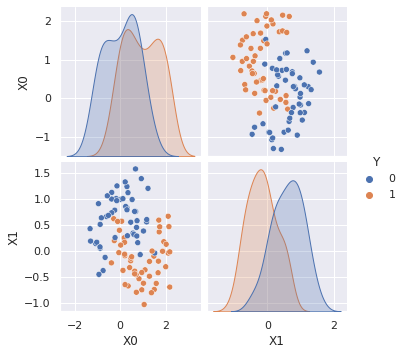

In [227]:
sns.pairplot(df_moon, hue='Y')

## Créer un maillage

In [228]:
def plage_de_valeur(df, col, b=0.2):
    # b = bordure
    mini = df[col].min() - b
    maxi = df[col].max() + b
    return mini, maxi

### Créer les axes

In [229]:
X0_range = np.arange(*plage_de_valeur(df_moon, 'X0'), 0.1)
X1_range = np.arange(*plage_de_valeur(df_moon, 'X1'), 0.1)

In [230]:
X0_range

array([-1.51850034, -1.41850034, -1.31850034, -1.21850034, -1.11850034,
       -1.01850034, -0.91850034, -0.81850034, -0.71850034, -0.61850034,
       -0.51850034, -0.41850034, -0.31850034, -0.21850034, -0.11850034,
       -0.01850034,  0.08149966,  0.18149966,  0.28149966,  0.38149966,
        0.48149966,  0.58149966,  0.68149966,  0.78149966,  0.88149966,
        0.98149966,  1.08149966,  1.18149966,  1.28149966,  1.38149966,
        1.48149966,  1.58149966,  1.68149966,  1.78149966,  1.88149966,
        1.98149966,  2.08149966,  2.18149966,  2.28149966])

In [231]:
X1_range

array([-1.23570207, -1.13570207, -1.03570207, -0.93570207, -0.83570207,
       -0.73570207, -0.63570207, -0.53570207, -0.43570207, -0.33570207,
       -0.23570207, -0.13570207, -0.03570207,  0.06429793,  0.16429793,
        0.26429793,  0.36429793,  0.46429793,  0.56429793,  0.66429793,
        0.76429793,  0.86429793,  0.96429793,  1.06429793,  1.16429793,
        1.26429793,  1.36429793,  1.46429793,  1.56429793,  1.66429793,
        1.76429793])

### Création du maillage

In [232]:
X0_mesh, X1_mesh = np.meshgrid(X0_range, X1_range)

In [233]:
X0_mesh.shape, X1_mesh.shape

((31, 39), (31, 39))

### Déméler le maillage

In [234]:
X0_mesh, X1_mesh = X0_mesh.ravel(), X1_mesh.ravel()
X0_mesh.shape, X1_mesh.shape

((1209,), (1209,))

In [235]:
mesh_df = pd.DataFrame({"X0": X0_mesh,
                        "X1": X1_mesh})

/home/vincent/.local/share/virtualenvs/MachineLearning-fTVY37zK/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vincent/.local/share/virtualenvs/MachineLearning-fTVY37zK/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X0', ylabel='X1'>

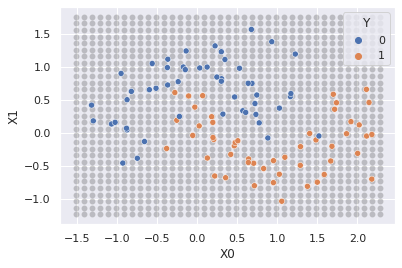

In [236]:
sns.scatterplot(X0_mesh, X1_mesh, color='black', alpha=0.2)
sns.scatterplot(df_moon['X0'], df_moon['X1'], hue=df_moon['Y'])

### Avec K1

In [237]:
knn = KNN(n_neighbors=1)
# entrainer sur moon
knn.fit(X, Y)

KNeighborsClassifier(n_neighbors=1)

/home/vincent/.local/share/virtualenvs/MachineLearning-fTVY37zK/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vincent/.local/share/virtualenvs/MachineLearning-fTVY37zK/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X0', ylabel='X1'>

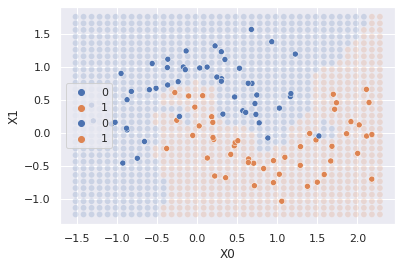

In [240]:
mesh_predictions = knn.predict(mesh_df)
sns.scatterplot(X0_mesh, X1_mesh, hue=mesh_predictions, alpha=0.2)
sns.scatterplot(df_moon['X0'], df_moon['X1'], hue=df_moon['Y'].tolist())

In [242]:
def plot_knn_decision(k=1):
    knn = KNN(n_neighbors=k)
    knn.fit(X, Y)
    mesh_predictions = knn.predict(mesh_df)
    sns.scatterplot(X0_mesh, X1_mesh, hue=mesh_predictions, alpha=0.2)
    sns.scatterplot(df_moon['X0'], df_moon['X1'], hue=df_moon['Y'].tolist())

/home/vincent/.local/share/virtualenvs/MachineLearning-fTVY37zK/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vincent/.local/share/virtualenvs/MachineLearning-fTVY37zK/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


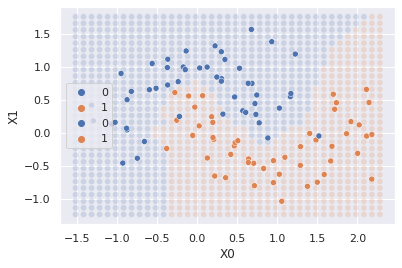

In [254]:
plot_knn_decision(3)